# 第三章 决策树算法



## 决策树 概述

决策树（Decision Tree）算法主要用来处理分类问题，是最经常使用的数据挖掘算法之一。

## 决策树 场景

一个叫做 "二十个问题" 的游戏，游戏的规则很简单：参与游戏的一方在脑海中想某个事物，其他参与者向他提问，只允许提 20 个问题，问题的答案也只能用对或错回答。问问题的人通过推断分解，逐步缩小待猜测事物的范围，最后得到游戏的答案。

一个邮件分类系统，大致工作流程如下：

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535008869074_CSbb7nJPvi.jpg)


首先检测发送邮件域名地址。如果地址为 myEmployer.com, 则将其放在分类 "无聊时需要阅读的邮件"中。  
如果邮件不是来自这个域名，则检测邮件内容里是否包含单词 "曲棍球" , 如果包含则将邮件归类到 "需要及时处理的朋友邮件", 如果不包含则将邮件归类到 "无需阅读的垃圾邮件" 。  

## 决策树 原理

### 决策树 须知概念

#### 信息熵 & 信息增益

熵： 熵（entropy）指的是体系的混乱的程度，在不同的学科中也有引申出的更为具体的定义，是各领域十分重要的参量。

信息熵（香农熵）： 是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值很低，相反，熵值很高。

信息增益： 在划分数据集前后信息发生的变化称为信息增益。

### 决策树 工作原理
如何构造一个决策树?
我们使用 createBranch() 方法，如下所示：

```
检测数据集中的所有数据的分类标签是否相同:
    If so return 类标签
    Else:
        寻找划分数据集的最好特征（划分之后信息熵最小，也就是信息增益最大的特征）
        划分数据集
        创建分支节点
            for 每个划分的子集
                调用函数 createBranch （创建分支的函数）并增加返回结果到分支节点中
        return 分支节点
```

### 决策树 开发流程

* 收集数据：可以使用任何方法。
* 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化。
* 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期。
* 训练算法：构造树的数据结构。
* 测试算法：使用经验树计算错误率。（经验树没有搜索到较好的资料，有兴趣的同学可以来补充）
* 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。

### 决策树 算法特点

* 优点：计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据。
* 缺点：可能会产生过度匹配问题。
* 适用数据类型：数值型和标称型。

## 决策树Demo演示

### Demo1：决策树分类-鸢尾花数据

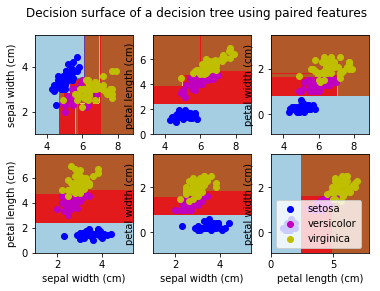

In [1]:
#!/usr/bin/python
# coding:utf-8

#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# 参数
n_classes = 3
plot_colors = "bmy"
plot_step = 0.02

# 加载数据
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
#for pairidx, pair in enumerate([[0, 1]]):
# 我们只用两个相应的features
    X = iris.data[:, pair]
    y = iris.target

    # 训练
    clf = DecisionTreeClassifier().fit(X, y)

    # 绘制决策边界
    plt.subplot(2, 3, pairidx + 1)
    #plt.subplot(1, 1, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # 绘制训练点
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()


### Demo2: 决策树回归


Automatically created module for IPython interactive environment


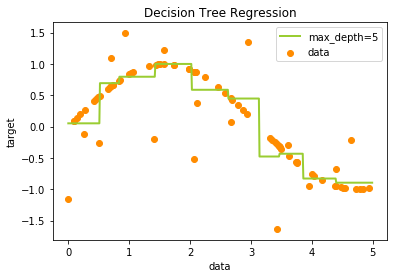

In [2]:
#!/usr/bin/python
# coding:utf8

print(__doc__)

# 引入必要的模型和库
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 创建一个随机的数据集
# 参考 https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.random.mtrand.RandomState.html
rng = np.random.RandomState(1)
# print 'lalalalala===', rng
# rand() 是给定形状的随机值，rng.rand(80, 1)即矩阵的形状是 80行，1列
# sort() 
X = np.sort(5 * rng.rand(80, 1), axis=0)
# print 'X=', X
y = np.sin(X).ravel()
# print 'y=', y
y[::5] += 3 * (0.5 - rng.rand(16))
# print 'yyy=', y

# 拟合回归模型
# regr_1 = DecisionTreeRegressor(max_depth=2)
# 保持 max_depth=5 不变，增加 min_samples_leaf=6 的参数，效果进一步提升了
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(min_samples_leaf=6)
# regr_3 = DecisionTreeRegressor(max_depth=4)
# regr_1.fit(X, y)
regr_2.fit(X, y)
# regr_3.fit(X, y)

# 预测
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
# y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
# y_3 = regr_3.predict(X_test)

# 绘制结果
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
# plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.plot(X_test, y_3, color="red", label="max_depth=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 决策树 项目案例

### 项目案例1: 判定鱼类和非鱼类

**项目概述**  

根据以下2个特征，将动物分成两类：鱼类和非鱼类。

特征: 1.不浮出水面是否可以生存 2.是否有脚蹼

**开发流程**

* 收集数据：可以使用任何方法
* 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化
* 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期
* 训练算法：构造树的数据结构
* 测试算法：使用决策树执行分类
* 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

> 收集数据：可以使用任何方法

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535009410799_7kQOw3ZIVz.jpg)

我们利用 createDataSet() 函数输入数据

In [3]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
            [1, 1, 'yes'],
            [1, 0, 'no'],
            [0, 1, 'no'],
            [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

> 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化

此处，由于我们输入的数据本身就是离散化数据，所以这一步就省略了。

> 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1535009496470_nvgbX1c29L.jpg)

计算给定数据集的香农熵的函数

In [4]:
def calcShannonEnt(dataSet):
    """
    Desc：
        calculate Shannon entropy -- 计算给定数据集的香农熵
    Args:
        dataSet -- 数据集
    Returns:
        shannonEnt -- 返回 每一组 feature 下的某个分类下，香农熵的信息期望
    """
    # -----------计算香农熵的第一种实现方式start------------------------------------------------
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 下面输出我们测试的数据集的一些信息
    # 例如：<type 'list'> numEntries:  5 是下面的代码的输出
    # print(type(dataSet), 'numEntries: ', numEntries)

    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # print('-----', featVec, labelCounts)

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
        # print('---', prob, prob * log(prob, 2), shannonEnt)
    # -----------计算香农熵的第一种实现方式end--------------------------------------------------

    # # -----------计算香农熵的第二种实现方式start----------------------------------------------
    # # 统计标签出现的次数
    # label_count = Counter(data[-1] for data in dataSet)
    # # 计算概率
    # probs = [p[1] / len(dataSet) for p in label_count.items()]
    # # 计算香农熵
    # shannonEnt = sum([-p * log(p, 2) for p in probs])
    # # -----------计算香农熵的第二种实现方式end--------------------------------------------------------------------------------
    return shannonEnt


按照给定特征划分数据集

将指定特征的特征值等于 value 的行剩下列作为子数据集。

In [5]:
def splitDataSet(dataSet, index, value):
    """splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet 数据集                 待划分的数据集
        index 表示每一行的index列        划分数据集的特征
        value 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index列为value的数据集【该数据集需要排除index列】
    """
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            '''
            请百度查询一下： extend和append的区别
            list.append(object) 向列表中添加一个对象object
            list.extend(sequence) 把一个序列seq的内容添加到列表中
            1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            result = []
            result.extend([1,2,3])
            print result
            result.append([4,5,6])
            print result
            result.extend([7,8,9])
            print result
            结果：
            [1, 2, 3]
            [1, 2, 3, [4, 5, 6]]
            [1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    return retDataSet

选择最好的数据集划分方式

In [6]:
def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)

    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # 数据集的原始信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取对应的feature下的所有数据
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            # 计算概率
            prob = len(subDataSet)/float(len(dataSet))
            # 计算信息熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print ('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

问：上面的 newEntropy 为什么是根据子集计算的呢？  
答：因为我们在根据一个特征计算香农熵的时候，该特征的分类值是相同，这个特征这个分类的香农熵为 0；
这就是为什么计算新的香农熵的时候使用的是子集。


> 训练算法：构造树的数据结构

创建树的函数代码如下：

In [7]:
def createTree(dataSet, labels):
    """
    Desc:
        创建决策树
    Args:
        dataSet -- 要创建决策树的训练数据集
        labels -- 训练数据集中特征对应的含义的labels，不是目标变量
    Returns:
        myTree -- 创建完成的决策树
    """
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print('myTree', value, myTree)
    return myTree


> 测试算法：使用决策树执行分类

In [8]:
def classify(inputTree, featLabels, testVec):
    """
    Desc:
        对新数据进行分类
    Args:
        inputTree  -- 已经训练好的决策树模型
        featLabels -- Feature标签对应的名称，不是目标变量
        testVec    -- 测试输入的数据
    Returns:
        classLabel -- 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel


> 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。

In [9]:
#项目一：判定鱼类和非鱼类
#decisionTreePlot.py
#!/usr/bin/python
# -*- coding: UTF-8 -*-


import matplotlib.pyplot as plt
%matplotlib inline

# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        # ----------写法1 start ---------------
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # ----------写法1 end ---------------

        # ----------写法2 start --------------
        # thisDepth = 1 + getTreeDepth(secondDict[key]) if type(secondDict[key]) is dict else 1
        # ----------写法2 end --------------
        # 记录最大的分支深度
        maxDepth = max(maxDepth, thisDepth)
    return maxDepth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    cntrPt = (plotTree.xOff + (1 + numLeafs) / 2 / plotTree.totalW, plotTree.yOff)
    # print(cntrPt)
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstStr = list(myTree.keys())[0]
    # 可视化Node分支点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]
    plotTree.yOff = plotTree.yOff - 1 / plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1 / plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1 / plotTree.totalD


def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='green')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


# # 测试画图
# def createPlot():
#     fig = plt.figure(1, facecolor='white')
#     fig.clf()
#     # ticks for demo puropses
#     createPlot.ax1 = plt.subplot(111, frameon=False)
#     plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#     plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#     plt.show()


# 测试数据集
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]


# myTree = retrieveTree(1)
# createPlot(myTree)


Automatically created module for IPython interactive environment
infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
+++ no surfacing xxx {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}} --- 1 >>> {'flippers': {0: 'no', 1: 'yes'}}
+++ flippers xxx {0: 'no', 1: 'yes'} --- 1 >>> yes
yes


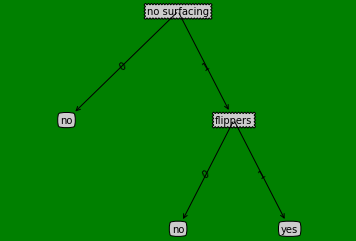

In [10]:
#项目一：判定鱼类和非鱼类
#DecisionTree.py
#!/usr/bin/python
# -*- coding: UTF-8 -*-

print(__doc__)
import operator
from math import log
#import decisionTreePlot as dtPlot
from collections import Counter


def createDataSet():
    """
    Desc:
        创建数据集
    Args:
        无需传入参数
    Returns:
        返回数据集和对应的label标签
    """
    # dataSet 前两列是特征，最后一列对应的是每条数据对应的分类标签
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    # dataSet = [['yes'],
    #         ['yes'],
    #         ['no'],
    #         ['no'],
    #         ['no']]
    # labels  露出水面   脚蹼，注意：这里的labels是写的 dataSet 中特征的含义，并不是对应的分类标签或者说目标变量
    labels = ['no surfacing', 'flippers']
    # 返回
    return dataSet, labels


def calcShannonEnt(dataSet):
    """
    Desc：
        calculate Shannon entropy -- 计算给定数据集的香农熵
    Args:
        dataSet -- 数据集
    Returns:
        shannonEnt -- 返回 每一组 feature 下的某个分类下，香农熵的信息期望
    """
    # -----------计算香农熵的第一种实现方式start----------------------------------------------
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 下面输出我们测试的数据集的一些信息
    # 例如：<type 'list'> numEntries:  5 是下面的代码的输出
    # print(type(dataSet), 'numEntries: ', numEntries)

    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurance
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        # print('-----', featVec, labelCounts)

    # 对于label标签的占比，求出label标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # log base 2
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
        # print('---', prob, prob * log(prob, 2), shannonEnt)
    # -----------计算香农熵的第一种实现方式end------------------------------------------------

    # # -----------计算香农熵的第二种实现方式start--------------------------------------------
    # # 统计标签出现的次数
    # label_count = Counter(data[-1] for data in dataSet)
    # # 计算概率
    # probs = [p[1] / len(dataSet) for p in label_count.items()]
    # # 计算香农熵
    # shannonEnt = sum([-p * log(p, 2) for p in probs])
    # # -----------计算香农熵的第二种实现方式end----------------------------------------------
    return shannonEnt


def splitDataSet(dataSet, index, value):
    """
    Desc：
        划分数据集
        splitDataSet(通过遍历dataSet数据集，求出index对应的colnum列的值为value的行)
        就是依据index列进行分类，如果index列的数据等于 value的时候，就要将 index 划分到我们创建的新的数据集中
    Args:
        dataSet  -- 数据集                 待划分的数据集
        index -- 表示每一行的index列        划分数据集的特征
        value -- 表示index列对应的value值   需要返回的特征的值。
    Returns:
        index 列为 value 的数据集【该数据集需要排除index列】
    """
    # -----------切分数据集的第一种方式 start------------------------------------
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            '''
            请百度查询一下： extend和append的区别
            list.append(object) 向列表中添加一个对象object
            list.extend(sequence) 把一个序列seq的内容添加到列表中
            1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            result = []
            result.extend([1,2,3])
            print(result)
            result.append([4,5,6])
            print(result)
            result.extend([7,8,9])
            print(result)
            结果：
            [1, 2, 3]
            [1, 2, 3, [4, 5, 6]]
            [1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    # -----------切分数据集的第一种方式 end------------------------------------

    # # -----------切分数据集的第二种方式 start------------------------------------
    # retDataSet = [data[:index] + data[index + 1:] for data in dataSet for i, v in enumerate(data) if i == index and v == value]
    # # -----------切分数据集的第二种方式 end------------------------------------
    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    """
    Desc:
        选择切分数据集的最佳特征
    Args:
        dataSet -- 需要切分的数据集
    Returns:
        bestFeature -- 切分数据集的最优的特征列
    """

    # -----------选择最优特征的第一种方式 start------------------------------------
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # label的信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取每一个实例的第i+1个feature，组成list集合
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
    # -----------选择最优特征的第一种方式 end------------------------------------

    # # -----------选择最优特征的第二种方式 start------------------------------------
    # # 计算初始香农熵
    # base_entropy = calcShannonEnt(dataSet)
    # best_info_gain = 0
    # best_feature = -1
    # # 遍历每一个特征
    # for i in range(len(dataSet[0]) - 1):
    #     # 对当前特征进行统计
    #     feature_count = Counter([data[i] for data in dataSet])
    #     # 计算分割后的香农熵
    #     new_entropy = sum(feature[1] / float(len(dataSet)) * calcShannonEnt(splitDataSet(dataSet, i, feature[0])) \
    #                    for feature in feature_count.items())
    #     # 更新值
    #     info_gain = base_entropy - new_entropy
    #     print('No. {0} feature info gain is {1:.3f}'.format(i, info_gain))
    #     if info_gain > best_info_gain:
    #         best_info_gain = info_gain
    #         best_feature = i
    # return best_feature
    # # -----------选择最优特征的第二种方式 end------------------------------------


def majorityCnt(classList):
    """
    Desc:
        选择出现次数最多的一个结果
    Args:
        classList label列的集合
    Returns:
        bestFeature 最优的特征列
    """
    # -----------majorityCnt的第一种方式 start------------------------------------
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    # 倒叙排列classCount得到一个字典集合，然后取出第一个就是结果（yes/no），即出现次数最多的结果
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # print('sortedClassCount:', sortedClassCount)
    return sortedClassCount[0][0]
    # -----------majorityCnt的第一种方式 end------------------------------------

    # # -----------majorityCnt的第二种方式 start------------------------------------
    # major_label = Counter(classList).most_common(1)[0]
    # return major_label
    # # -----------majorityCnt的第二种方式 end------------------------------------


def createTree(dataSet, labels):
    """
    Desc:
        创建决策树
    Args:
        dataSet -- 要创建决策树的训练数据集
        labels -- 训练数据集中特征对应的含义的labels，不是目标变量
    Returns:
        myTree -- 创建完成的决策树
    """
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print('myTree', value, myTree)
    return myTree


def classify(inputTree, featLabels, testVec):
    """
    Desc:
        对新数据进行分类
    Args:
        inputTree  -- 已经训练好的决策树模型
        featLabels -- Feature标签对应的名称，不是目标变量
        testVec    -- 测试输入的数据
    Returns:
        classLabel -- 分类的结果值，需要映射label才能知道名称
    """
    # 获取tree的根节点对于的key值
    firstStr = list(inputTree.keys())[0]
    # 通过key得到根节点对应的value
    secondDict = inputTree[firstStr]
    # 判断根节点名称获取根节点在label中的先后顺序，这样就知道输入的testVec怎么开始对照树来做分类
    featIndex = featLabels.index(firstStr)
    # 测试数据，找到根节点对应的label位置，也就知道从输入的数据的第几位来开始分类
    key = testVec[featIndex]
    valueOfFeat = secondDict[key]
    print('+++', firstStr, 'xxx', secondDict, '---', key, '>>>', valueOfFeat)
    # 判断分枝是否结束: 判断valueOfFeat是否是dict类型
    if isinstance(valueOfFeat, dict):
        classLabel = classify(valueOfFeat, featLabels, testVec)
    else:
        classLabel = valueOfFeat
    return classLabel


def storeTree(inputTree, filename):
    """
    Desc:
        将之前训练好的决策树模型存储起来，使用 pickle 模块
    Args:
        inputTree -- 以前训练好的决策树模型
        filename -- 要存储的名称
    Returns:
        None
    """
    import pickle
    # -------------- 第一种方法 start --------------
    fw = open(filename, 'wb')
    pickle.dump(inputTree, fw)
    fw.close()
    # -------------- 第一种方法 end --------------

    # -------------- 第二种方法 start --------------
    with open(filename, 'wb') as fw:
        pickle.dump(inputTree, fw)
    # -------------- 第二种方法 start --------------


def grabTree(filename):
    """
    Desc:
        将之前存储的决策树模型使用 pickle 模块 还原出来
    Args:
        filename -- 之前存储决策树模型的文件名
    Returns:
        pickle.load(fr) -- 将之前存储的决策树模型还原出来
    """
    import pickle
    fr = open(filename, 'rb')
    return pickle.load(fr)


def fishTest():
    """
    Desc:
        对动物是否是鱼类分类的测试函数，并将结果使用 matplotlib 画出来
    Args:
        None
    Returns:
        None
    """
    # 1.创建数据和结果标签
    myDat, labels = createDataSet()
    # print(myDat, labels)

    # 计算label分类标签的香农熵
    # calcShannonEnt(myDat)

    # # 求第0列 为 1/0的列的数据集【排除第0列】
    # print('1---', splitDataSet(myDat, 0, 1))
    # print('0---', splitDataSet(myDat, 0, 0))

    # # 计算最好的信息增益的列
    # print(chooseBestFeatureToSplit(myDat))

    import copy
    myTree = createTree(myDat, copy.deepcopy(labels))
    print(myTree)
    # [1, 1]表示要取的分支上的节点位置，对应的结果值
    print(classify(myTree, labels, [1, 1]))

    # 画图可视化展现
    #dtPlot.createPlot(myTree)
    createPlot(myTree)


if __name__ == "__main__":
     fishTest()
    #ContactLensesTest()


### 项目案例2: 使用决策树预测隐形眼镜类型

**项目概述**  
隐形眼镜类型包括硬材质、软材质以及不适合佩戴隐形眼镜。我们需要使用决策树预测患者需要佩戴的隐形眼镜类型。

**开发流程**  
1. 收集数据: 提供的文本文件。
2. 解析数据: 解析 tab 键分隔的数据行
3. 分析数据: 快速检查数据，确保正确地解析数据内容，使用 createPlot() 函数绘制最终的树形图。
4. 训练算法: 使用 createTree() 函数。
5. 测试算法: 编写测试函数验证决策树可以正确分类给定的数据实例。
6. 使用算法: 存储树的数据结构，以便下次使用时无需重新构造树。

> 收集数据：提供的文本文件

文本文件数据格式如下：

```
young   myope   no  reduced no lenses
pre myope   no  reduced no lenses
presbyopic  myope   no  reduced no lenses
```

> 解析数据：解析 tab 键分隔的数据行

```
lecses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
```

> 分析数据：快速检查数据，确保正确地解析数据内容，使用 createPlot() 函数绘制最终的树形图。

```
>>> treePlotter.createPlot(lensesTree)
```

> 训练算法：使用 createTree() 函数

```
>>> lensesTree = trees.createTree(lenses, lensesLabels)
>>> lensesTree
{'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic':{'yes':
{'prescript':{'hyper':{'age':{'pre':'no lenses', 'presbyopic':
'no lenses', 'young':'hard'}}, 'myope':'hard'}}, 'no':{'age':{'pre':
'soft', 'presbyopic':{'prescript': {'hyper':'soft', 'myope':
'no lenses'}}, 'young':'soft'}}}}}
```

>测试算法: 编写测试函数验证决策树可以正确分类给定的数据实例。

>使用算法: 存储树的数据结构，以便下次使用时无需重新构造树。

使用 pickle 模块存储决策树




In [12]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

infoGain= 0.03939650364612124 bestFeature= 0 1.3260875253642983 1.286691021718177
infoGain= 0.039510835423565815 bestFeature= 1 1.3260875253642983 1.2865766899407325
infoGain= 0.37700523001147723 bestFeature= 2 1.3260875253642983 0.9490822953528211
infoGain= 0.5487949406953986 bestFeature= 3 1.3260875253642983 0.7772925846688997
infoGain= 0.22125183600446618 bestFeature= 0 1.5545851693377994 1.3333333333333333
infoGain= 0.09543725231055489 bestFeature= 1 1.5545851693377994 1.4591479170272446
infoGain= 0.7704260414863776 bestFeature= 2 1.5545851693377994 0.7841591278514218
infoGain= 0.3166890883150208 bestFeature= 0 0.6500224216483541 0.3333333333333333
infoGain= 0.19087450462110933 bestFeature= 1 0.6500224216483541 0.4591479170272448
infoGain= 1.0 bestFeature= 0 1.0 0.0
infoGain= 0.2516291673878229 bestFeature= 0 0.9182958340544896 0.6666666666666666
infoGain= 0.4591479170272448 bestFeature= 1 0.9182958340544896 0.4591479170272448
infoGain= 0.9182958340544896 bestFeature= 0 0.918295834

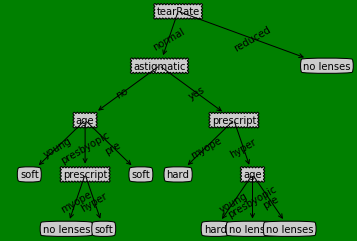

In [13]:
#项目案例2: 使用决策树预测隐形眼镜类型

def ContactLensesTest():
    """
    Desc:
        预测隐形眼镜的测试代码，并将结果画出来
    Args:
        none
    Returns:
        none
    """

    # 加载隐形眼镜相关的 文本文件 数据
    fr = open('/code/决策树算法/lenses.txt')
    # 解析数据，获得 features 数据
    lenses = [inst.strip().split('\t') for inst in fr.readlines()]
    # 得到数据的对应的 Labels
    lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
    # 使用上面的创建决策树的代码，构造预测隐形眼镜的决策树
    lensesTree = createTree(lenses, lensesLabels)
    print(lensesTree)
    # 画图可视化展现
    #dtPlot.createPlot(lensesTree)
    createPlot(lensesTree)


if __name__ == "__main__":
    #fishTest()
    ContactLensesTest()


## 课后练习
 
毒蘑菇数据集（mushrooms.csv）地址：https://tianchi.aliyun.com/datalab/dataSet.html?spm=5176.100073.0.0.60686fc1IVH3DW&dataId=2922

No.|Attribute|Attribute Value
-|-|-
1|classes| edible=e, poisonous=p
2|cap-shape| bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
3|cap-surface| fibrous=f,grooves=g,scaly=y,smooth=s
4|cap-color| brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
5|bruises| bruises=t,no=f
6|odor| almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
7|gill-attachment| attached=a,descending=d,free=f,notched=n
8|gill-spacing| close=c,crowded=w,distant=d
9|gill-size| broad=b,narrow=n
10|gill-color| black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
11|stalk-shape| enlarging=e,tapering=t
12|stalk-root| bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
13|stalk-surface-above-ring| fibrous=f,scaly=y,silky=k,smooth=s
14|stalk-surface-below-ring| fibrous=f,scaly=y,silky=k,smooth=s
15|stalk-color-above-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16|stalk-color-below-ring| brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
17|veil-type| partial=p,universal=u
18|veil-color| brown=n,orange=o,white=w,yellow=y
19|ring-number| none=n,one=o,two=t
20|ring-type| cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
21|spore-print-color| black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
22|population| abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
23|habitat| grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


In [32]:
import numpy as np
import pandas as pd

data = pd.read_csv('/code/决策树算法/mushrooms_new.csv',engine='python')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### 3.编写C4.5算法类

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1536387502003_9KyNe4Zgng.jpg)

In [34]:
class C4_5_Tree():
    '''
    C4.5算法在ID3的基础上加了IV，
    主要是解决了ID3算法对可取值数目较多的属性有所偏好
    '''
    def __init__(self):
        self.__dataSet = None
        self.__tree = None
        
    # 计算信息熵
    def get_entropy(self,dataSet):
        n = len(dataSet)
        label_count = dict(dataSet.iloc[:,-1].value_counts())
        ent=0.0
        for key in label_count.keys():
            prob = label_count[key]/n
            ent -= prob* np.log2(prob)
        return ent
    # 计算信息增益率 c4.5比id3算法多了iv
    def get_gain_ratio(self,dataSet,feature):
        D = len(dataSet)
        #使用DataFrame.groupby()划分出同一列下不同属性值的数据组，计算各自的信息熵，然后累加
        ent_sum = dataSet.groupby(feature).apply(lambda x:(len(x)/D)*self.get_entropy(x)).sum()
        #计算整体的信息熵
        ent_D = self.get_entropy(dataSet)
        gain = ent_D - ent_sum
        #使用DataFrame.groupby()划分出同一列下不同属性值的数据组，计算各自的IV，然后累加
        iv = dataSet.groupby(feature).apply(lambda x:-(len(x)/D)*np.log2(len(x)/D)).sum()
        if iv==0:
            return 0
        else:
            gain_ratio = gain/iv
        return gain_ratio
    # 选择最佳分割特征
    def choose_best_feature(self,dataSet):
        max_gain_ratio = 0.0
        for feat in dataSet.columns[:-1]:
            gain_ratio=self.get_gain_ratio(dataSet,feat)
            #选出信息增益率最大的特征为划分特征
            if gain_ratio>max_gain_ratio:
                max_gain_ratio = gain_ratio
                best_feature = feat
        return best_feature
    #划分数据集
    def split_dataSet(self,dataSet,feature,featVal):
        new_dataSet = dataSet[dataSet[feature]==featVal]
        new_dataSet = new_dataSet.drop(feature,axis=1)
        return new_dataSet
    #创建树
    def creat_tree(self,dataSet):
        #停止条件1；当前节点包含的样本全属于同一个类别时，无需划分
        label_list = dataSet.iloc[:,-1]
        if len(set(label_list))==1:
            return label_list.values[0]
        #停止条件2；当前属性集为空，或是所有样本在所有属性上取值一样，无法划分
        features = dataSet.columns[:-1]
        if len(features)==0 or len(dataSet.loc[:,features].drop_duplicates())==1:
            # 选出label数最大的label
            return label_list.value_counts().idxmax()
        best_feat = self.choose_best_feature(dataSet)
        #构造树结构
        tree = {best_feat:{}}
        #取出这个最佳特征列里的所有特征值并用set去重
        uniqueFeatVals = set(dataSet.loc[:,best_feat])
        #根据这一列的特征值进行整个数据的划分
        for featVal in uniqueFeatVals:
            #切分出一个最佳特征列值都为featVal的所有行
            new_dataSet = self.split_dataSet(dataSet,best_feat,featVal)
            #递归创建每个featVal的子树
            tree[best_feat][featVal]=self.creat_tree(new_dataSet)
        return tree
    #导入训练数据并学出树模型
    def fit(self,train_X,train_y):
        self.__dataSet = pd.concat([train_X,train_y],axis=1)
        self.__tree = self.creat_tree(self.__dataSet)
    #将函数变成属性，保护隐藏变量
    @property
    def tree(self):
        return self.__tree
    #递归函数，选出每一行数据的label
    def __predict_son(self,tree,dataSet):
        feat = list(tree.keys())[0]
        featVal = dataSet[feat]
        nextTree = tree[feat][featVal]
        if type(nextTree)==dict:
            return self.__predict_son(nextTree,dataSet)
        else:
            return nextTree
    #预测函数，将DataFrame数据切分成一行一行的数据
    def predict(self,test_X):
        n=len(test_X)
        predict_list=[]
        #遍历出每一行数据
        for i in range(n):
            data = test_X.iloc[i]
            result = self.__predict_son(self.__tree,data)
            predict_list.append(result)
        return predict_list


### 4.划分出训练集和测试集

In [35]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,1:],data['class'],test_size=0.33,random_state =0)
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
2484,x,f,e,t,n,f,c,b,p,t,...,s,w,g,p,w,o,p,k,v,d
6411,x,s,n,f,f,f,c,n,b,t,...,k,p,p,p,w,o,e,w,v,d
5466,k,y,n,t,n,f,c,b,e,e,...,s,w,e,p,w,t,e,w,c,w
1450,f,f,n,f,n,f,w,b,h,t,...,s,w,w,p,w,o,e,k,a,g
4214,x,f,y,f,f,f,c,b,g,e,...,k,b,p,p,w,o,l,h,y,g


### 5.训练模型并预测

5.1实例化对象

In [36]:
Tree = C4_5_Tree()

5.2训练模型

In [37]:
Tree.fit(X_train,y_train)

 5.3树结构

In [38]:
Tree.tree

{'odor': {'c': 'p',
  'p': 'p',
  'y': 'p',
  'm': 'p',
  'f': 'p',
  's': 'p',
  'n': {'spore-print-color': {'k': 'e',
    'o': 'e',
    'b': 'e',
    'r': 'p',
    'w': {'veil-color': {'y': 'p',
      'w': {'gill-size': {'n': {'gill-spacing': {'c': 'p',
          'w': {'bruises': {'f': 'e', 't': 'p'}}}},
        'b': 'e'}}}},
    'h': 'e',
    'n': 'e',
    'y': 'e'}},
  'a': 'e',
  'l': 'e'}}

5.4预测

In [39]:
y_test_hat=Tree.predict(X_test)

5.5 计算精度

In [40]:
print('模型预测精度为：%0.2f'%(accuracy_score(y_test_hat,y_test)))

模型预测精度为：1.00
